<a href="https://colab.research.google.com/github/BricoBC/redes/blob/main/Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOS SCRIPTS A CONTINUACIÓN SE CREARON CON LA FINALIDAD DE QUE SE GENERE UN ARCHIVO TXT PARA PODER COPIAR Y PEGAR LOS COMANDOS CORRESPONDIENTES EN EL PACKET TRACER CISCO. 

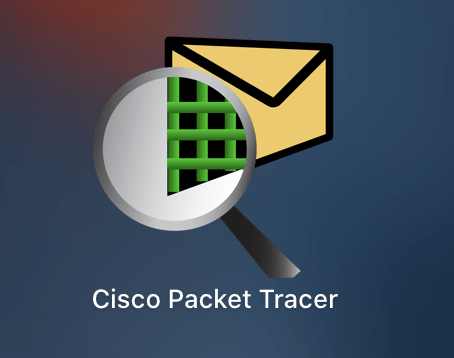

## CAMBIAR EL NOMBRE AL ROUTER

In [ ]:
name_router = input("Nuevo nombre del router: ")
file = open("NAME ROUTER.txt","a")
file.write(f"hostname {name_router}")
file.close()

## SI ES QUE QUEREMOS CONTRASEÑAS

In [ ]:
pass_console = str(input("Digita la contraseña de consola: "))
pass_secret = str(input("Digita la contraseña secreta: "))
file = open("Contraseñas.txt", "a")

file.write("line console 0 \n")
file.write(f"password {pass_console} \n")
file.write(f"login \n\n")

file.write("line vty 0 4\n")
file.write(f"password {pass_console} \n")
file.write(f"login \n\n")

file.write(f"enable pass {pass_secret} \n")
file.write(f"enable secret {pass_secret} \n")
file.write(f"service password-encryption \n")
file.close()

Digita la contraseña de consola: Cisco
Digita la contraseña secreta: Cisco


## PARA GENERAR LAS INTERFACES SERIALES Y FAST

In [9]:
# r es para leer
#a ponemos el contenido al final
#w sobreescribir información o crear uno
def serial_router(j):#--------------------Serial Router
  cantidad_router = int(input(f"¿En el router {j + 1} con cuántos más routers lo tienes conectado? "))

  for k in range(cantidad_router):
    ip_router = str(input(f"¿Cual es la IP de tu Router#{j + 1} en tu conexión {k + 1} (s{k + 1}/0): "))
    mask_router = str(input(f"¿Cual es la SUBNET MASK de tu Router#{ j + 1}: "))

    #file = open("SERIAL Y FAST.txt", "a")  
    file.write(f"------ROUTER {j + 1} SERIAL------- \n")
    file.write(f"int s{ j + 1 }/0 \n")
    file.write(f"ip add {ip_router} {mask_router} \n")
    
    clock_rate = input("¿Este router tiene clock rate? ").lower()
    if clock_rate == "si" or clock_rate == "sí":
      file.write(f"clock rate 64000 \n") 
    file.write("no shutdown \n\n")

    if k == 0: #ESTO ES PARA QUE SOLO PREGUNTE UNA VEZ POR LOS SWITCH DE UN ROUTER
      cantidad_switch = int(input("¿Cuantos switch tienes conectado en el Router? "))
      for i in range(cantidad_switch):
        fast_switch(j,i)

def fast_switch(j,i):#-----------------------------Fast Switch
  file = open("SERIAL Y FAST.txt", "a")
  file.write(f"------ROUTER {j+1} FAST {i + 1}------- \n")
  ip1 = str(input("¿Cual es la IP de tu Switch #" + str(i + 1) + ": "))
  mask1 = str(input("¿Cual es la SUBNET MASK de tu Switch #" + str(i + 1) +": "))
  file.write(f"int f{i}/0 \n")
  file.write(f"ip add {ip1} {mask1} \n")
  file.write("no shutdown \n")
  file.write("exit\n\n")

#-----------------------MAIN
file = open("SERIAL Y FAST.txt", "a")

cantidad_routers = int(input("¿Cuantos routers vas a conectar? "))
for i in range(cantidad_routers):  
  serial_router(i)

print("REVISA YA EL TXT")
file.close()

¿Cuantos routers vas a conectar? 2
¿En el router 1 con cuántos más routers lo tienes conectado? 1
¿Cual es la IP de tu Router#1 en tu conexión 1 (s1/0): 192.168.11.1
¿Cual es la SUBNET MASK de tu Router#1: 255.255.255.0
¿Este router tiene clock rate? SÍ
¿Cuantos switch tienes conectado en el Router? 1
¿Cual es la IP de tu Switch #1: 192.168.10.1
¿Cual es la SUBNET MASK de tu Switch #1: 255.255.255.0
¿En el router 2 con cuántos más routers lo tienes conectado? 1
¿Cual es la IP de tu Router#2 en tu conexión 1 (s1/0): 192.168.11.2
¿Cual es la SUBNET MASK de tu Router#2: 255.255.255.0
¿Este router tiene clock rate? NO
¿Cuantos switch tienes conectado en el Router? 1
¿Cual es la IP de tu Switch #1: 192.168.12.1
¿Cual es la SUBNET MASK de tu Switch #1: 255.255.255.0
REVISA YA EL TXT


## CONFIG SSH

In [ ]:
name_domain = input("Ingresa el nombre del dominio: ")
bits_decoded = input("¿Cuántos bits en el modulo va a usar en el decifrado? ")
time_out = input("Tiempo de login (en segundos): ")
number_tries = input(f"¿Cuántos intentos le damos? ")
username = input("Nombre del usuario: ")
password = input("Digita la contraseña del usuario: ")
time_exec = input(f"¿Cuánto es el tiempo de ejecución para estar en linea? (minutos) ")

file = open("CONFIG SSH.txt", "a")
file.write(f"ip domain-name {name_domain}\n")
file.write(f"crypto key generate rsa\n")
file.write(f"{bits_decoded}\n")
file.write(f"ip ssh time-out {time_out}\n")
file.write(f"ip ssh authentication-retries {number_tries}\n")
file.write(f"username {username} pass {password}\n")
file.write(f"line vty 0 4\n")
file.write(f"exec-timeout {time_exec}\n")
file.write(f"transport input ssh\n")
file.write(f"login local\n")
file.write(f"end\n")
file.write(f"exit\n")
file.close()

Ingresa el nombre del dominio: labIci10.com
¿Cuántos bits en el modulo va a usar en el decifrado? 1000
Tiempo de login (en segundos): 15
¿Cuántos intentos le damos? 5
Nombre del usuario: Amay
Digita la contraseña del usuario: 123
¿Cuánto es el tiempo de ejecución para estar en linea? (minutos) 1


## PROTOCOLO RIP

In [ ]:
file = open("RIP.txt", "a")
cantidad_router_generales = int(input("¿Cuántos routers generales pondrás? "))
file.write(f"router rip\n")
for i in range(cantidad_router_generales):
  ip_general = input(f"Digita tu ip general #{i+1}: ")
  file.write(f"net {ip_general} \n")
file.write(f"no auto-summary \n")
file.write(f"exit\n")
file.write(f"exit\n")
file.write(f"wr")
file.close()

¿Cuántos routers generales pondrás? 2
Digita tu ip general #1: 125
Digita tu ip general #2: 126


## SI ES QUE QUEREMOS HACER UNA CONFIGURACIÓN EIGRP


In [ ]:
import numpy as np
#Funciones de las submascaras
def submascara_red(num):
  assert num < 32, "No existe un prefijo mayor a 32"
  submascara = np.concatenate((np.ones(num, dtype=np.int64),np.zeros(32 - num, dtype=np.int64)))
  submascara = submascara.reshape(4,8)
  
  submascara = submascara * [[  2**i for i in range(7,-1,-1) ]]
  submascara = submascara.sum(axis=1)
  return submascara

def submascara_EIGRP(num):
  submascara = [255-i for i in  submascara_red(num)] 
  return submascara


#Llenamos una tabla en donde la posición 0 de las filas será la ip general del router
#y las demás columnas serán los nombres de los routers
matrix_r = []

n_router = int(input("¿CUÁNTAS ip's generales de routers tienes? "))

for _ in range (n_router):
  print()
  data_router = []
  data_router.append(input(f"Digita la IP #{_+1} general de tus routers: "))
  data_router.append(input(f"Indica su PREFIJO de la SUBMASCARA: "))
  n_routers = int(input(f"¿CUÁNTOS routers tiene la {data_router[0]}? "))

  for i in range(1,n_routers+1,1):
    data_router.append(input(f"Nombre del Router #{i} de tu ip {data_router[0]}: "))
  
  matrix_r.append(data_router)

#.....................................
#Realizamos un vector en donde esten todos los nombres de los routers

routers_name = np.copy(matrix_r)

routers_name = np.delete(routers_name, [0,1], axis=1)
routers_name = routers_name.reshape(routers_name.size)
routers_name = np.unique(routers_name)

#.........................................
#Haremos una tabla en donde la posición 0 de las filas será el nombre del router
#y las demás columnas serán las ip's generales de los switches
matrix_s = []

for i in range(len(routers_name)):
  print()
  data_switch = []
  n_switch = int(input(f"En {routers_name[i]} ¿CUÁNTAS ips's generales de switch tienes? "))
  data_switch.append(routers_name[i])
  for j in range(n_switch):
    data_switch.append(input(f"Digita la ip general del switch #{j+1} del {routers_name[i]}: "))
    data_switch.append(input(f"Indica su prefijo de la submascara: "))
  matrix_s.append(data_switch)



¿CUÁNTAS ip's generales de routers tienes? 2

Digita la IP #1 general de tus routers: 172.16.2.0
Indica su PREFIJO de la SUBMASCARA: 24
¿CUÁNTOS routers tiene la 172.16.2.0? 2
Nombre del Router #1 de tu ip 172.16.2.0: R1
Nombre del Router #2 de tu ip 172.16.2.0: R2

Digita la IP #2 general de tus routers: 192.168.1.0
Indica su PREFIJO de la SUBMASCARA: 24
¿CUÁNTOS routers tiene la 192.168.1.0? 2
Nombre del Router #1 de tu ip 192.168.1.0: R2
Nombre del Router #2 de tu ip 192.168.1.0: R3

En R1 ¿CUÁNTAS ips's generales de switch tienes? 1
Digita la ip general del switch #1 del R1: 172.16.3.0
Indica su prefijo de la submascara: 24

En R2 ¿CUÁNTAS ips's generales de switch tienes? 1
Digita la ip general del switch #1 del R2: 172.16.1.0
Indica su prefijo de la submascara: 24

En R3 ¿CUÁNTAS ips's generales de switch tienes? 1
Digita la ip general del switch #1 del R3: 192.168.2.0
Indica su prefijo de la submascara: 24


In [ ]:
import numpy as np

#Creación del bloc de texto
copy_matrix_r = np.copy(matrix_r)
copy_matrix_s = np.copy(matrix_s)
copy_routers_name = np.copy(routers_name)

print(copy_matrix_r)
print()
print(copy_matrix_s)
print()
print(copy_routers_name)

file = open("Configuración EIGRP 100.txt", "a")
#n_configuracion = routers_name.size
#for _ in range(n_configuracion):
file.write(f"---------------------{routers_name[0]}------------------- \n")
file.write("router eigrp 100 \n")

dimension = copy_matrix_r.shape

for i in range( dimension[0] ):
  for j in range( dimension[1] ):

    if routers_name[0] == copy_matrix_r[i][j]:
      submascara = submascara_EIGRP( int(copy_matrix_r[i][1]) )

      net = (f"net {copy_matrix_r[i][0]} {submascara} \n")
      net = net.replace(', ', '.')
      net = net.replace('[', ' ')
      net = net.replace(']', '')
      file.write(f"{net}")

dimension = copy_matrix_s.shape
print(f"dimension de matrix s {dimension}")
for i in range( dimension[0] ):
  for j in range( dimension[1] ):

    if routers_name[0] == copy_matrix_s[i][j]:
      submascara = submascara_EIGRP( int(copy_matrix_s[i][1]) )

      net = (f"net {copy_matrix_s[i][0]} {submascara} \n")
      net = net.replace(', ', '.')
      net = net.replace('[', ' ')
      net = net.replace(']', '')
      file.write(f"{net}")

file.write("No auto-summary \n\n")
file.close()

[['172.16.2.0' '24' 'R1' 'R2']
 ['192.168.1.0' '24' 'R2' 'R3']]

[['R1' '172.16.3.0' '24']
 ['R2' '172.16.1.0' '24']
 ['R3' '192.168.2.0' '24']]

['R1' 'R2' 'R3']
dimension de matrix s (3, 3)
